### AI Lab -  Assignment 4 - CH22M503

#### Author - Aloy Banerjee
###### Roll No. CH22M503

## Question:
#### Please use the dataset provided for this assignment. You have to work only with the file with your roll number specified on it. The feature columns are x 0, x 1, x 2,...., and the class column is y.
#### Q1 Classify the dataset using Logistic regression. Also implement the LDA and QDA and find the model performance.
#### Q2 Use the Decision tree classifier to classify the given dataset. Tune the model and identify the optimal hyperparameters.
#### Q3 Classify the dataset using Bagging Classifier and Random Forest classifier models. Tune the model for the best hyperparmeters. 
#### Q4 Compare the models and elaborate on your findings

#### Importing Library

In [1]:
#Import library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,RocCurveDisplay,accuracy_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
sns.set(context="notebook", palette="viridis", style="darkgrid", font_scale=1.0, color_codes=True,rc={'figure.figsize':(14,10)})

#### Common variable declaration

In [2]:
workingDir = 'E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 4\\Datasets\\Datasets'
dataset_fileName = 'ch22m50 (3).csv'
modelObj = []

#### Common function

In [79]:
def perform_Logistic_regression(X_train,y_train,X_test,y_test):
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc_lr = lr.score(X_test, y_test)
    print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
    generate_result(lr, y_pred, 'Logistic Regression',y_test)
    
def generate_result(model, predictions, name,y_test):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, cmap = 'Spectral', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()
    modelObj.append(model)
    
def LDA_Analysis(X_train,y_train,X_test,y_test):
    lda=LinearDiscriminantAnalysis() 
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    acc_lda = lda.score(X_test, y_test)
    print('The accuracy for Linear Discriminant Analysis is:', acc_lda * 100, '%')
    generate_result(lda, y_pred, 'LDA',y_test)
    
def QDA_Analysis(X_train,y_train,X_test,y_test):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)
    acc_qda = qda.score(X_test, y_test)
    print('The accuracy for Quadratic Discriminant Analysis is:', acc_qda * 100, '%')
    generate_result(qda, y_pred, 'QDA',y_test)
    
def perform_DecesionTree_Classification(X_train,y_train,X_test,y_test):
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, np.ravel(y_train))
    Y_pred = clf.predict(X_test)
    acc_dt = clf.score(X_test, y_test)
    print('The accuracy for Decision Tree Classification is:', acc_dt * 100, '%')
    generate_result(clf, Y_pred, 'DecisionTree Classifier',np.ravel(y_test))
    
def random_Forest_Classifier(n_estimators,X_train,y_train,X_test,y_test):
    n_estimators = n_estimators
    random_forest=RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test)
    acc_rn = random_forest.score(X_test, y_test)
    print("The accuracy for Random Forest Classifier is:", acc_rn * 100, "%")
    generate_result(random_forest, y_pred, 'Random Forest Classifier',y_test)
    
def bagging_Classifier(n_estimators,X_train,y_train,X_test,y_test):
    n_estimators = n_estimators
    basemodel=DecisionTreeClassifier(random_state=42)
    bagging_classifier=BaggingClassifier(base_estimator=basemodel,n_estimators=n_estimators, random_state=42)
    bagging_classifier.fit(X_train,y_train)
    y_pred = bagging_classifier.predict(X_test)
    acc_bg = bagging_classifier.score(X_test, y_test)
    print("The accuracy for Bagging Classifier is:", acc_bg * 100, "%")
    generate_result(bagging_classifier, y_pred, 'Bagging Classifier',y_test)
    
def hyperparameter_tuning(param_grid, obj_model_classifier, obj_grid_model, X_train, Y_train, X_test, Y_test, model_name):
    obj_model_classifier.fit(X_train, np.ravel(Y_train))
    obj_grid_model.fit(X_train, np.ravel(Y_train))
    print("Best hyperparameters: ", obj_grid_model.best_params_)
    print("Best score: ", obj_grid_model.best_score_)
    print('In train dataset:')
    print(f'Hypertuned {model_name} score: {accuracy_score(obj_grid_model.predict(X_train),Y_train)}')
    print(f'Normal {model_name} score: {accuracy_score(obj_model_classifier.predict(X_train),Y_train)}')
    print('In test dataset:')
    print(f'Hypertuned {model_name}score: {accuracy_score(obj_grid_model.predict(X_test),Y_test)}')
    print(f'Normal {model_name} score: {accuracy_score(obj_model_classifier.predict(X_test),Y_test)}')
    modelObj.append(obj_grid_model) 

def acc_plot(train_acc,test_acc,models): 
    fig = plt.figure()
    n_bars = len(train_acc)
    x1 = np.arange(1,(n_bars)*2,2)
    x2 = np.arange(1,(n_bars)*2,2)+0.6
    plt.bar(x1,train_acc,color='y',label='Train',width=0.8)
    plt.bar(x2,test_acc,color='b',label='Test',width=0.8)
    plt.xticks(ticks=x1+0.3,labels=models,)
    plt.xticks(rotation=45)
    plt.xlabel('Models')
    plt.ylabel('Accuracies')
    fig.suptitle('Accuracy for different classification models', fontsize=20)
    plt.legend()
    plt.tight_layout()


##### Loading Dataset

In [4]:
#Change the working directory 
os.chdir(workingDir)
#Load the data
dataset = pd.read_csv(dataset_fileName)

##### Display info of dataset

In [5]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     512 non-null    float64
 1   x_1     512 non-null    float64
 2   x_2     512 non-null    float64
 3   x_3     512 non-null    float64
 4   x_4     512 non-null    float64
 5   x_5     512 non-null    float64
 6   x_6     512 non-null    float64
 7   x_7     512 non-null    float64
 8   x_8     512 non-null    float64
 9   x_9     512 non-null    float64
 10  x_10    512 non-null    float64
 11  x_11    512 non-null    float64
 12  x_12    512 non-null    float64
 13  x_13    512 non-null    float64
 14  x_14    512 non-null    float64
 15  x_15    512 non-null    float64
 16  x_16    512 non-null    float64
 17  x_17    512 non-null    float64
 18  x_18    512 non-null    float64
 19  x_19    512 non-null    float64
 20  x_20    512 non-null    float64
 21  x_21    512 non-null    float64
 22  x_

None

##### Display statistical information of each column of dataset 

In [6]:
display(dataset.describe())

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,y
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,...,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,2.439131,37.565795,-2.129354,-42.896385,-19.541749,0.774351,-3.318514,1.234039,-37.084747,44.457026,...,3.954715,7.062185,-1.984638,-0.041593,45.802623,-6.156434,20.336928,7.686032,46.116476,1.396484
std,79.668269,149.000493,70.127878,270.463154,169.129888,5.008753,82.998787,32.479082,165.128140,147.647250,...,136.591423,94.580884,35.141745,8.054942,210.354097,44.965474,185.172480,33.899699,222.968262,0.869705
min,-218.014426,-420.663489,-200.408297,-805.895235,-487.537653,-13.031117,-211.774697,-104.569640,-567.697872,-370.866192,...,-387.207794,-251.840570,-146.937805,-22.463712,-568.799810,-129.243517,-593.246183,-101.722870,-545.635486,0.000000
25%,-49.223112,-61.024707,-46.175353,-209.804499,-132.511157,-2.415076,-64.127241,-20.197596,-149.740462,-53.430691,...,-87.250875,-56.243393,-25.552702,-5.949824,-89.267524,-36.253059,-99.238991,-17.600614,-116.271767,1.000000
50%,12.155885,41.328052,-2.193064,-39.650751,-15.800571,0.672129,-9.072157,0.849871,-35.757947,41.890772,...,10.971585,3.737968,-3.289748,0.288603,55.123325,-7.736827,17.342673,8.372459,30.868008,1.000000
75%,60.213974,141.277355,46.198129,141.936365,96.539653,4.211238,50.150721,23.711935,75.528969,143.915499,...,87.445776,69.919878,21.889408,5.714857,190.281398,23.727257,144.533145,30.951389,204.465337,2.000000
max,199.703493,484.171709,211.004193,720.820175,441.163606,16.231479,253.060961,122.069373,478.614180,552.311766,...,461.229792,320.096620,106.122619,22.005079,675.198210,142.665835,613.995137,139.990511,766.813592,3.000000


##### Display the given dataset 

In [7]:
display(dataset)

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,y
0,16.920655,-42.645832,120.989582,204.158654,146.482712,10.931416,-148.843296,27.660603,-84.502239,12.294844,...,-62.325705,38.713472,-35.038464,-9.714632,36.987391,8.891164,-434.626733,42.773671,217.002701,3
1,33.112697,141.934286,-42.908480,272.840275,3.240221,2.900615,83.384757,38.419407,5.996595,-74.794468,...,-63.303622,69.658188,50.411234,-14.496756,62.013898,23.602845,-56.753575,55.810014,132.221649,1
2,-0.719035,162.356669,-25.289948,-38.063813,-45.747704,-1.768817,-34.906378,19.047969,-122.525011,37.495460,...,19.455654,99.033783,-14.787519,-2.837963,80.574733,37.568538,-55.843178,24.805701,-66.399042,1
3,41.114839,32.865930,3.375600,248.982501,145.736013,0.144523,-100.467590,-14.692076,-224.750326,5.088222,...,28.051349,-69.535135,6.634928,-0.086851,243.915623,-42.572195,349.780139,22.955581,115.350261,2
4,-98.954896,100.334688,22.108893,-509.285564,77.418419,-2.567594,27.837708,41.203306,195.284077,-47.101180,...,103.337332,100.588271,-40.951918,3.262511,174.265657,38.307570,-363.908029,52.254404,362.320497,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,-198.199135,-78.961783,101.635923,87.151381,85.924719,2.857203,-114.279865,122.069373,134.942756,36.458869,...,173.351132,-66.298207,-48.326594,-11.743241,158.089972,-41.033300,24.813333,87.438227,766.813592,2
508,109.290428,191.480509,12.303618,-305.932511,-40.519626,-3.313111,-69.436370,21.865336,-53.042458,69.572077,...,39.230760,-63.706061,-37.408941,7.334285,6.379320,-39.800946,-313.897782,-21.168608,-248.854618,3
509,-19.049404,9.356148,34.453434,100.074962,-239.541858,-0.075924,-28.929118,-9.993400,111.402361,-159.851843,...,106.780895,-174.278694,24.498491,0.962552,16.108659,-92.369189,-7.323660,-51.172846,412.148554,1
510,33.054867,-122.689085,-23.861270,417.833334,-26.519607,-3.545035,-97.259415,-5.704583,295.703536,156.880560,...,-239.699164,102.871363,-3.690261,14.396206,-37.507866,39.392993,-277.306626,-27.038689,488.231509,2


##### Checking for null or na values in data set 

In [8]:
dataset.isnull().isna().values.any()

False

In [9]:
input_x = dataset.drop('y', axis=1)
output_y = dataset[['y']] 

#### Unique output lable in the dataset

In [10]:
np.unique(output_y)

array([0, 1, 2, 3], dtype=int64)

#### Train and test split for data set

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(input_x, output_y, test_size=0.2, random_state=42)

#### Q1. Classify the dataset using Logistic regression. Also implement the LDA and QDA and find the model performance.

##### Logistic Regression

The accuracy for Logistic Regression is: 52.42718446601942 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        17
           1       0.56      0.83      0.67        47
           2       0.50      0.50      0.50        28
           3       0.00      0.00      0.00        11

    accuracy                           0.52       103
   macro avg       0.39      0.35      0.32       103
weighted avg       0.47      0.52      0.46       103



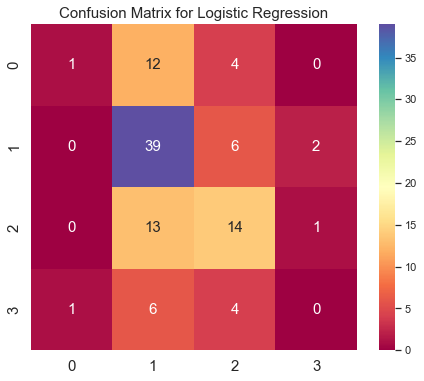

In [12]:
perform_Logistic_regression(X_train,np.ravel(Y_train),X_test,np.ravel(Y_test))

##### LDA

The accuracy for Linear Discriminant Analysis is: 53.398058252427184 %

The classification report for LDA is:
              precision    recall  f1-score   support

           0       0.67      0.12      0.20        17
           1       0.57      0.83      0.67        47
           2       0.50      0.50      0.50        28
           3       0.00      0.00      0.00        11

    accuracy                           0.53       103
   macro avg       0.43      0.36      0.34       103
weighted avg       0.50      0.53      0.48       103



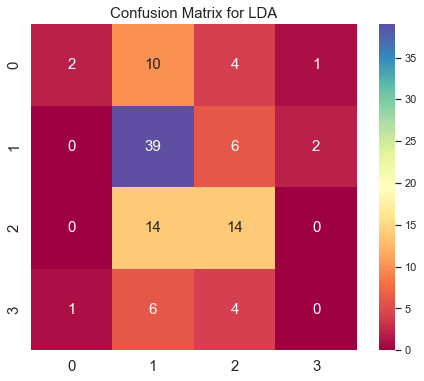

In [13]:
 LDA_Analysis(X_train,np.ravel(Y_train),X_test,np.ravel(Y_test))

##### QDA

The accuracy for Quadratic Discriminant Analysis is: 53.398058252427184 %

The classification report for QDA is:
              precision    recall  f1-score   support

           0       0.60      0.18      0.27        17
           1       0.57      0.74      0.65        47
           2       0.44      0.54      0.48        28
           3       0.67      0.18      0.29        11

    accuracy                           0.53       103
   macro avg       0.57      0.41      0.42       103
weighted avg       0.55      0.53      0.50       103



C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


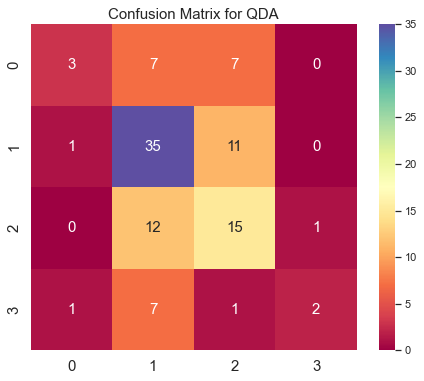

In [14]:
 QDA_Analysis(X_train,np.ravel(Y_train),X_test,np.ravel(Y_test))

## 

#### Q2. Use the Decision tree classifier to classify the given dataset. Tune the model and identify the optimal hyperparameters.

#### Decision Tree Classifier

The accuracy for Decision Tree Classification is: 39.80582524271845 %

The classification report for DecisionTree Classifier is:
              precision    recall  f1-score   support

           0       0.44      0.24      0.31        17
           1       0.57      0.60      0.58        47
           2       0.23      0.21      0.22        28
           3       0.16      0.27      0.20        11

    accuracy                           0.40       103
   macro avg       0.35      0.33      0.33       103
weighted avg       0.41      0.40      0.40       103



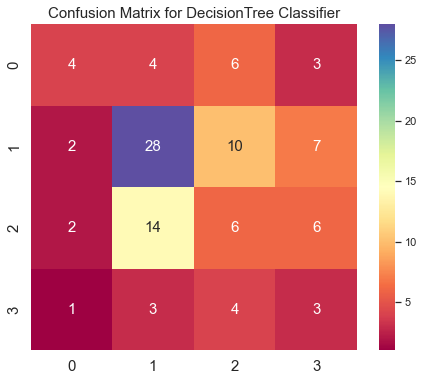

In [15]:
perform_DecesionTree_Classification(X_train,Y_train,X_test,Y_test)

##### Hyperparameter Tuning of Decision Tree Classifier

In [16]:
# Define the parameter grid to search over
param_grid_decisionTree = {'criterion': ['gini', 'entropy'],
              'max_depth': list(range(3,9)),
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None],
              "max_leaf_nodes": np.linspace(10,50,30).astype(int)
             }
model_dtree_clf = DecisionTreeClassifier(random_state=42)
mod_grid_search = GridSearchCV(model_dtree_clf, param_grid_decisionTree, cv=5)
hyperparameter_tuning(param_grid_decisionTree, model_dtree_clf, mod_grid_search, X_train, Y_train, X_test, Y_test, 'Decision Tree Classifier')

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 12, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score:  0.5109906654622102
In train dataset:
Hypertuned Decision Tree Classifier score: 0.5770171149144254
Normal Decision Tree Classifier score: 1.0
In test dataset:
Hypertuned Decision Tree Classifierscore: 0.4854368932038835
Normal Decision Tree Classifier score: 0.39805825242718446


#### Q3. Classify the dataset using Bagging Classifier and Random Forest classifier models. Tune the model for the best hyperparmeters.

#### Random Forest Classifier

The accuracy for Random Forest Classifier is: 47.57281553398058 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.48      0.89      0.62        47
           2       0.47      0.25      0.33        28
           3       0.00      0.00      0.00        11

    accuracy                           0.48       103
   macro avg       0.24      0.29      0.24       103
weighted avg       0.34      0.48      0.37       103



C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


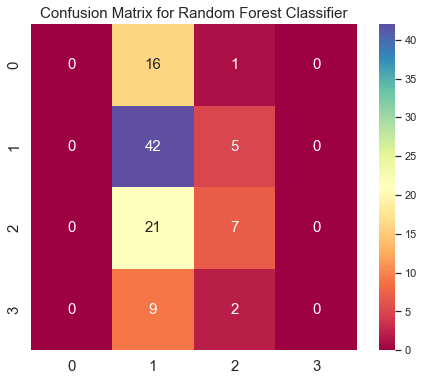

In [17]:
random_Forest_Classifier(1000,X_train,np.ravel(Y_train),X_test,np.ravel(Y_test))

##### Hyperparameter Tuning of Random Forest Classifier

In [18]:
param_grid_random_forest = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
mod_rf = RandomForestClassifier(random_state=40)
mod_grid_search = GridSearchCV(mod_rf, param_grid=param_grid_random_forest, cv=5)
hyperparameter_tuning(param_grid_random_forest, mod_rf, mod_grid_search, X_train, Y_train, X_test, Y_test, 'Random Forest Classifier')

Best hyperparameters:  {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score:  0.5378199337548931
In train dataset:
Hypertuned Random Forest Classifier score: 0.8973105134474327
Normal Random Forest Classifier score: 1.0
In test dataset:
Hypertuned Random Forest Classifierscore: 0.5242718446601942
Normal Random Forest Classifier score: 0.4854368932038835


#### Bagging Classifier

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The accuracy for Bagging Classifier is: 53.398058252427184 %

The classification report for Bagging Classifier is:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.53      0.89      0.67        47
           2       0.57      0.43      0.49        28
           3       0.33      0.09      0.14        11

    accuracy                           0.53       103
   macro avg       0.36      0.35      0.32       103
weighted avg       0.43      0.53      0.45       103



C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


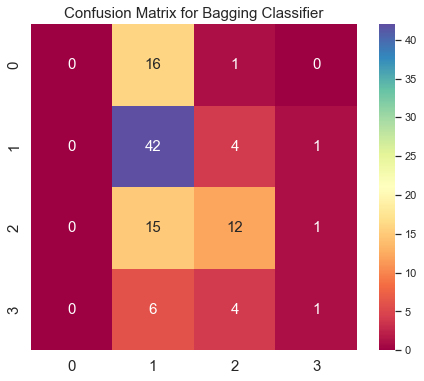

In [19]:
bagging_Classifier(100,X_train,np.ravel(Y_train),X_test,np.ravel(Y_test))

##### Hyperparameter Tuning of Bagging Classifier

In [20]:
param_grid_bagging_classifier = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(base_estimator=base_estimator, random_state=42)
scorer = make_scorer(accuracy_score)
mod_grid_search = GridSearchCV(estimator=bagging_clf,param_grid=param_grid_bagging_classifier,scoring=scorer,cv=5,n_jobs=-1)
hyperparameter_tuning(param_grid_bagging_classifier, bagging_clf, mod_grid_search, X_train, Y_train, X_test, Y_test,'Bagging Classifier')

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best hyperparameters:  {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Best score:  0.5524540800963565
In train dataset:
Hypertuned Bagging Classifier score: 1.0
Normal Bagging Classifier score: 0.9779951100244498
In test dataset:
Hypertuned Bagging Classifierscore: 0.5048543689320388
Normal Bagging Classifier score: 0.46601941747572817


##### Q4 Compare the models and elaborate on your findings

## Performance Analyzer :
### Logistics Regression :<br>

The accuracy for Logistic Regression is: <b>52.42718446601942 %</b><br>
The classification report for Logistic Regression is:


|  #| precision              |  recall            |  f1-score            | support           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  0             |0.50       |0.06      | 0.11         |  17      |
|  1             | 0.56        | 0.83        | 0.67        |  47     |
|  2             | 0.50        | 0.50       | 0.50        |  28     |
|  3             | 0.00       | 0.00        | 0.00        |  11    |
|  accuracy             |        |         | 0.52        |  103    |
|  macro avg             | 0.39        |  0.35       | 0.32        |  103    |
|  weighted avg             |  0.47      | 0.52        | 0.46        |  103    |


### LDA : <br>
The accuracy for Linear Discriminant Analysis is: <b>53.398058252427184 %</b><br>
The classification report for LDA is:<br>


|  #| precision              |  recall            |  f1-score            | support           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  0             |0.67       |0.12      | 0.20         |  17     |
|  1             | 0.57        | 0.83        | 0.67        |  47     |
|  2             | 0.50        | 0.50       | 0.50        |  28     |
|  3             | 0.00       | 0.00       | 0.00        |  11    |
|  accuracy             |        |         | 0.53        |  103    |
|  macro avg             | 0.43        |  0.36       | 0.34        |  103    |
|  weighted avg             |  0.50      | 0.53        | 0.48        |  103    |


### QDA :<br>
The accuracy for Quadratic Discriminant Analysis is: <b>53.398058252427184 %</b><br>
The classification report for QDA is:


|  #| precision              |  recall            |  f1-score            | support           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  0             |0.60       |0.18      | 0.27         |  17     |
|  1             | 0.57        | 0.74        | 0.65        |  47     |
|  2             | 0.44        | 0.54       | 0.48        |  28     |
|  3             | 0.67       | 0.18       | 0.29        |  11    |
|  accuracy             |        |         | 0.53        |  103    |
|  macro avg             | 0.57        |  0.41       | 0.42        |  103    |
|  weighted avg             |  0.55      | 0.53        | 0.50        |  103    |


### Decision Tree :
Best hyperparameters:  <b>{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 12, 'min_samples_leaf': 1, 'min_samples_split': 5}</b><br>
Best score:  <b>0.5109906654622102</b><br>

The accuracy for Decision Tree Classification is: <b>39.80582524271845 %</b><br>
The classification report for DecisionTree Classifier is:<br>


|  #| precision              |  recall            |  f1-score            | support           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  0             |0.44       |0.24      | 0.31         |  17     |
|  1             | 0.57        | 0.60        | 0.58        |  47     |
|  2             | 0.23        | 0.21       | 0.22        |  28     |
|  3             | 0.16       | 0.27       | 0.20        |  11    |
|  accuracy             |        |         | 0.40        |  103    |
|  macro avg             | 0.35        |  0.33      | 0.33        |  103    |
|  weighted avg             |  0.41      | 0.40        | 0.40        |  103    |

###### In train dataset:<br>
Hypertuned Decision Tree Classifier score: <b>0.5770171149144254</b><br>
Normal Decision Tree Classifier score: <b>1.0</b><br>

###### In test dataset:<br>
Hypertuned Decision Tree Classifierscore: <b>0.4854368932038835</b><br>
Normal Decision Tree Classifier score: <b>0.39805825242718446</b><br>


### Random Forest :
Best Parameters: <b>{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}</b><br>
    Best Score: <b>0.5378199337548931</b><br>

The accuracy for Random Forest Classifier is: <b>47.57281553398058 %</b><br>
The classification report for Random Forest Classifier is:

|  #| precision              |  recall            |  f1-score            | support           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  0             |0.00       |0.00      | 0.00         |  17     |
|  1             | 0.48        | 0.89        | 0.62        |  47     |
|  2             | 0.47        | 0.25       | 0.33        |  28     |
|  3             | 0.00       | 0.00       | 0.00        |  11    |
|  accuracy             |        |         | 0.48        |  103    |
|  macro avg             | 0.24        |  0.29       | 0.24        |  103    |
    |  weighted avg             |  0.34      | 0.48        | 0.37        |  103    |

###### In train dataset:<br>
Hypertuned random forest score: <b>0.8973105134474327</b><br>
Normal random forest score: <b>1.0</b><br>

###### In test dataset:<br>
Hypertuned random forest score: <b>0.5242718446601942</b><br>
Normal random forest score: <b>0.4854368932038835</b><br>

### Bagging Classifier :
Best hyperparameters:  <b>{'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}</b><br>
Best score:  <b>0.5524540800963565</b><br>

The accuracy for Bagging Classifier is: <b>53.398058252427184 %</b><br>
The classification report for Bagging Classifier is:

|  #| precision              |  recall            |  f1-score            | support           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  0             |0.00       |0.00      | 0.00         |  17     |
|  1             | 0.53        | 0.89        | 0.67        |  47     |
|  2             | 0.57        | 0.43       | 0.49        |  28     |
|  3             | 0.33       | 0.09       | 0.14        |  11    |
|  accuracy             |        |         | 0.53        |  103    |
|  macro avg             | 0.36        |  0.35       | 0.32        |  103    |
    |  weighted avg             |  0.43      | 0.53        | 0.45        |  103    |

###### In train dataset:<br>
Hypertuned Bagging Classifier score: <b>1.0</b><br>
Normal Bagging Classifier score: <b>0.9779951100244498</b><br>

###### In test dataset:<br>
Hypertuned Bagging Classifierscore: <b>0.5048543689320388</b><br>
Normal Bagging Classifier score: <b>0.46601941747572817</b><br>

#### Plot the accuracies for different model

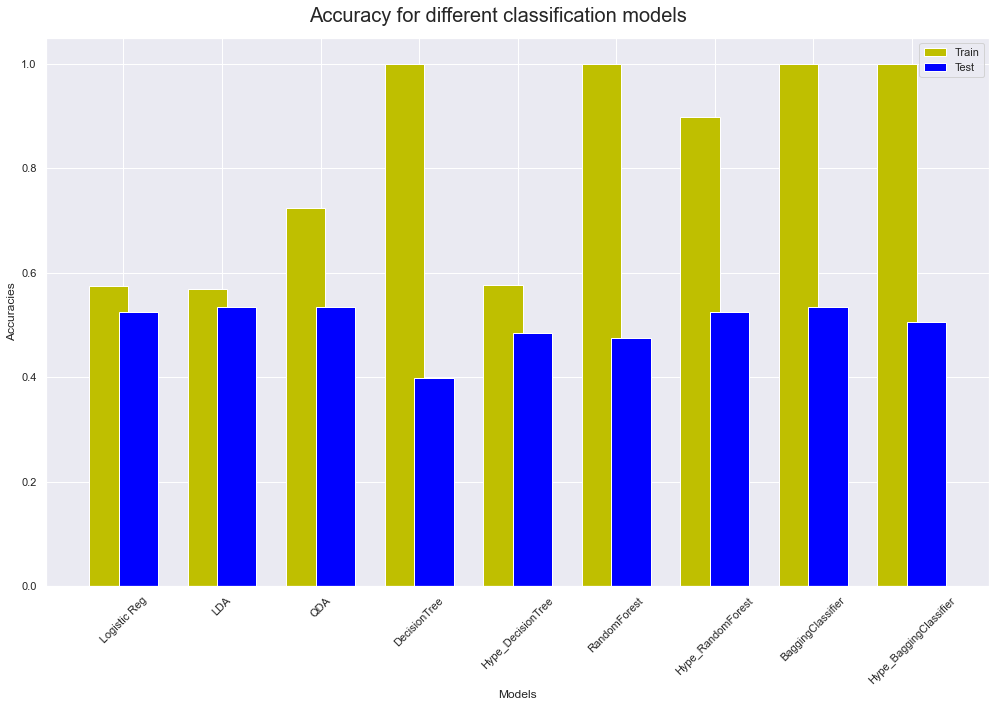

In [80]:
models = modelObj
model_names=['Logistic Reg', 'LDA', 'QDA', 'DecisionTree','Hype_DecisionTree', 'RandomForest', 'Hype_RandomForest', 'BaggingClassifier', 'Hype_BaggingClassifier']
train_accs,test_accs=[],[]
for model in models:
    train_acc = accuracy_score(model.predict(data[0]), data[2])
    train_accs.append(train_acc)
    test_acc = accuracy_score(model.predict(data[1]), data[3])
    test_accs.append(test_acc)
acc_plot(train_accs,test_accs,model_names)

# Conclusion : 

#### In the above cell we have kept the extensive performance analysis for different classification algorithm.

##### 1. We have seen that Linear Discriminant & Quadratic Discriminant analyzer perform slightly better on the given dataset compared to logistic regression.

##### 2. For decision tree classifier, when we have used untuned model to train and test data, we have received high accuracy in train set but comparatively poor result in test data, but after performing hyper parameter tuning on the model, train accuracy reduce but on the other hand model start performing better than previous in test data.

##### 3. For Random foreset classifier both tuned and untuned model perform very well in train data, on the other hand, in test dataset,  though the performance is not that well compared to train data,  but they are performing decently. More importantly looking at the accuracy score we can see that in random forest hypertuned model perform much better than decision tree classifier due to use of parallel ensemble. Alongside that in test datasaet hyperparameter tuned model perform better than normal model.

##### 4. For Bagging classifier also both tuned and untuned model perform almost perfectly in traing data, on the other hand in test dataset though the performance is not that well compared to train data but the performaning decently. Bagging classifier also perform better than normal decision tree due to bagging process under parallel ensemble.Alongside that in test datasaet hyperparameter tuned model perform better than normal model.

##### 5. Comparing all the model we have used and tuned on test dataset LDA and QDA perform best followed by Random Forest model.